# Project Description:

Outliers pose a significant challenge in machine learning, and overlooking them can lead to bad performance model. This project aims to comprehensively address various aspects of outliers, including their detection and the techniques employed for outlier treatment.

# Outlier Detection Techniques

# 1. WINSORIZATION METHOD

If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [11]:
import pandas as pd 
import numpy as np
df = pd.read_csv("C:/Users/ssmit/Desktop/ttrain.csv")

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
train = df
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(train['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


# DBSCAN 
DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE

DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers. This approch is similar to the K-mean clustering. There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.


In [24]:
import pandas as pd
from sklearn.cluster import DBSCAN
train = df
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
DB_outliers(train['Fare']) 

cluster
 0     705
 2      50
 4      36
-1      32
 6      15
 1      12
 7       8
 5       7
 8       7
 9       7
 3       6
 10      6
Name: count, dtype: int64


# ISOLATION FOREST

It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest

In [33]:
from sklearn.ensemble import IsolationForest
import pandas as pd


train = df

train['Fare'].fillna(train[train['Pclass'] == 3]['Fare'].median(), inplace=True)

def Iso_outliers(df):

    df_reshaped = df.values.reshape(-1, 1)
    
    # Create an Isolation Forest model
    iso = IsolationForest(random_state=1, contamination=0.05)
    

    preds = iso.fit_predict(df_reshaped)
    
   
    data = pd.DataFrame({'cluster': preds})
    print(data['cluster'].value_counts().sort_values(ascending=False))


Iso_outliers(train['Fare'])


cluster
 1    853
-1     38
Name: count, dtype: int64


# Data visualization 


Data visualization is helpful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters.

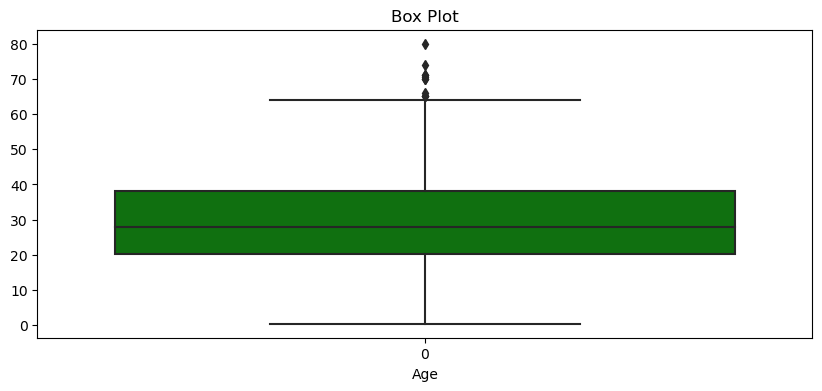

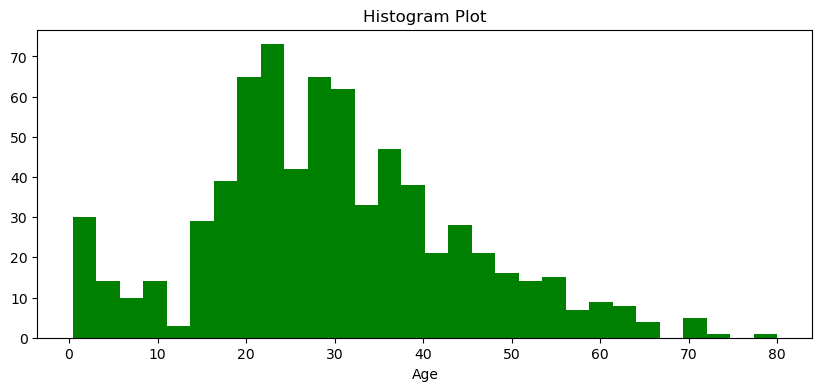

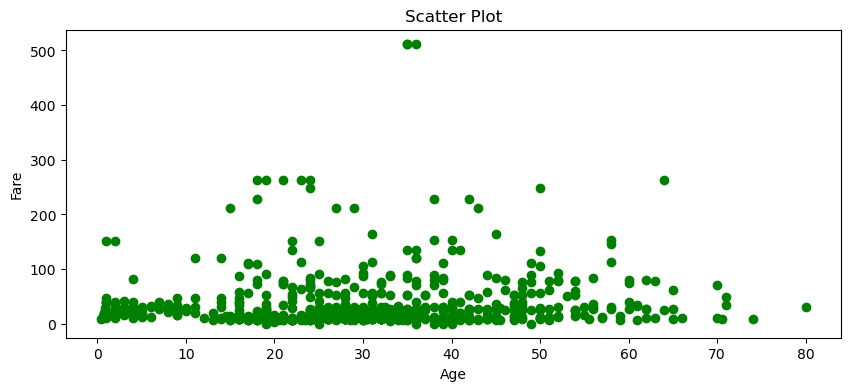

C:\Users\ssmit\AppData\Local\Temp\ipykernel_30452\41471943.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, color='green')


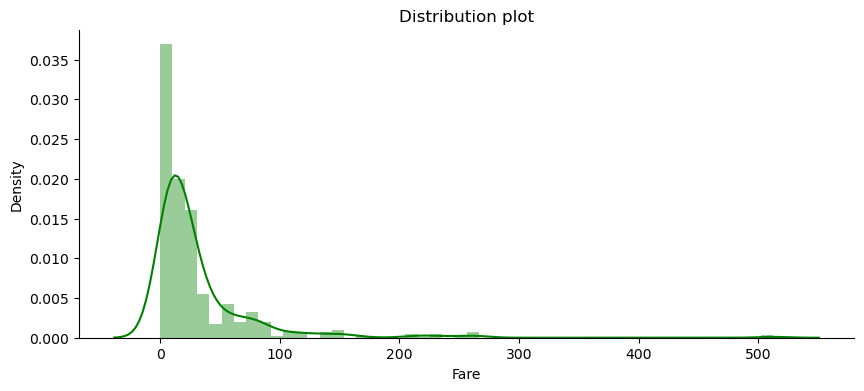

<Figure size 1000x400 with 0 Axes>

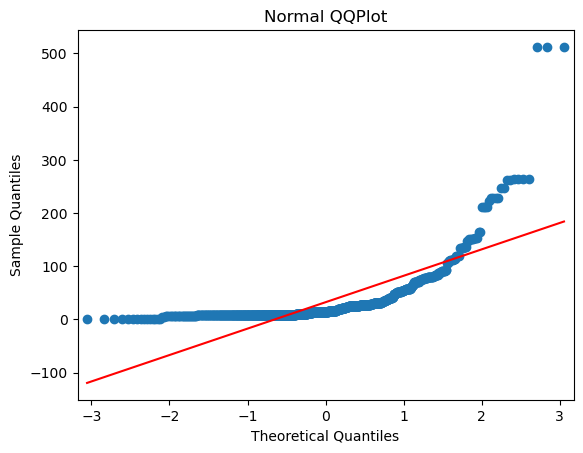

In [48]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv("C:/Users/ssmit/Desktop/train.csv")

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    plt.xlabel("Age")
    sns.boxplot(df, color='green')
    plt.show()
Box_plots(train['Age'])



def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df, color='green', bins=30)  
    plt.title("Histogram Plot")
    plt.xlabel("Age")
    plt.show()

hist_plots(train['Age'])


def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2, color='green')
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df, color='green')
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s',)
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['Fare'])

# Deleting Observations

Deleting outlier values is a common practice, especially when the outliers are attributed to data entry errors, data processing issues, or when the number of outlier observations is relatively small. Alternatively, trimming at both ends of the distribution to exclude extreme values is another approach. However, it's crucial to exercise caution when removing observations, particularly in the case of small datasets. Deleting data points can have a more pronounced impact on statistical analyses and may result in a loss of valuable information. Therefore, careful consideration and transparency about the reasons for outlier removal are essential, especially in scenarios where dataset size is limited.

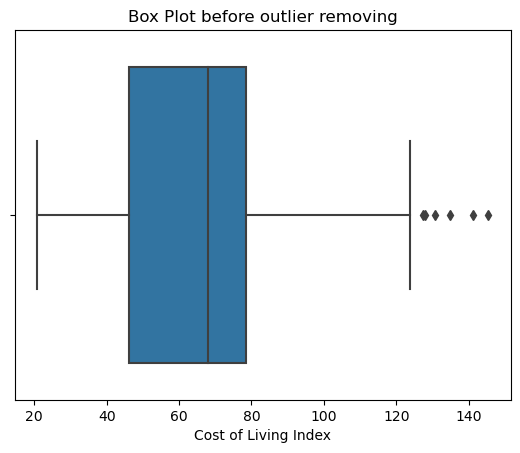

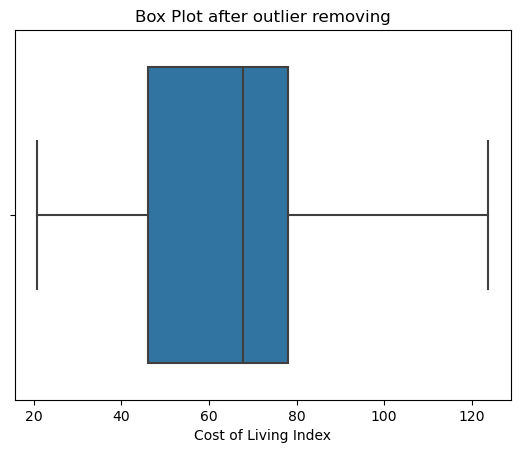

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

train = pd.read_csv("C:/Users/ssmit/Desktop/cost-of-living-2018.csv")


sns.boxplot(x='Cost of Living Index', data=train)
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    
   
    df = df.loc[~((df[field_name] > (iqr + np.percentile(df[field_name], 75))) | 
                  (df[field_name] < (np.percentile(df[field_name], 25) - iqr)))]

    return df

# Remove outliers and reset index
train = drop_outliers(train, 'Cost of Living Index').reset_index(drop=True)

# Create a box plot after outlier removal
sns.boxplot(x='Cost of Living Index', data=train)
plt.title("Box Plot after outlier removing")
plt.show()



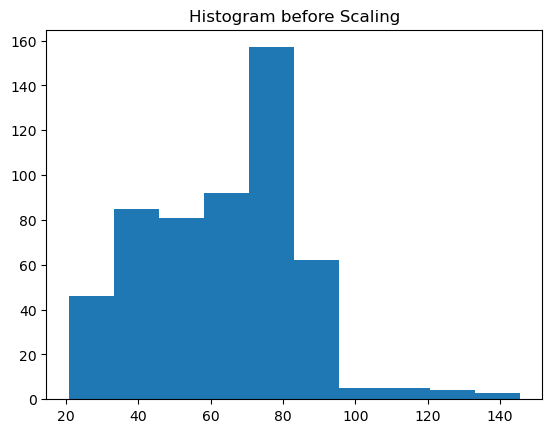

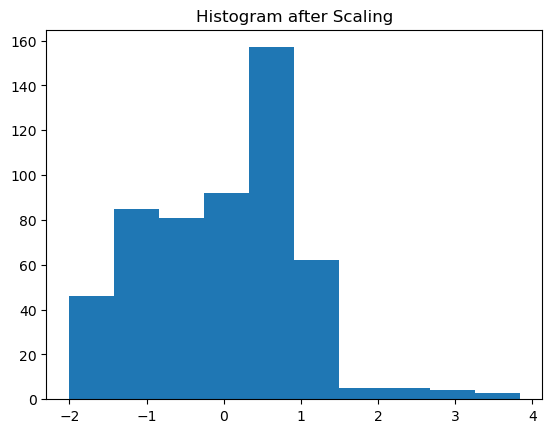

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
train = pd.read_csv("C:/Users/ssmit/Desktop/cost-of-living-2018.csv"
)
plt.hist(train['Cost of Living Index'])
plt.title("Histogram before Scaling")
plt.show()
scaler = preprocessing.StandardScaler()
train['Cost of Living Index'] = scaler.fit_transform(train['Cost of Living Index'].values.reshape(-1,1))
plt.hist(train['Cost of Living Index'])
plt.title("Histogram after Scaling")
plt.show()


# Box-transformation

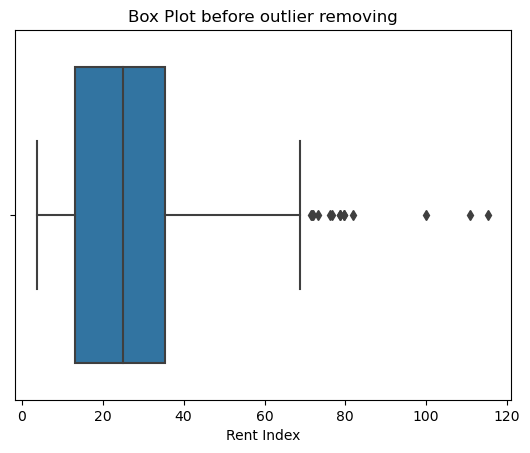

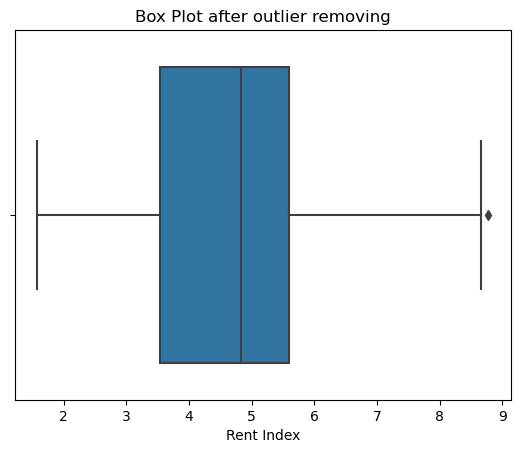

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy


train = pd.read_csv("C:/Users/ssmit/Desktop/cost-of-living-2018.csv")

sns.boxplot(x='Rent Index', data=train)
plt.title("Box Plot before outlier removing")
plt.show()

# Apply Box-Cox Transformation
train['Rent Index'], fitted_lambda = scipy.stats.boxcox(train['Rent Index'], lmbda=None)

# Boxplot After Outlier Removal 
sns.boxplot(x='Rent Index', data=train)
plt.title("Box Plot after outlier removing")
plt.show()


Imputation of Missing Values

# Mean Imputation Method

Technique used to fill missing values in a dataset by replacing them with the mean value of the available data. 


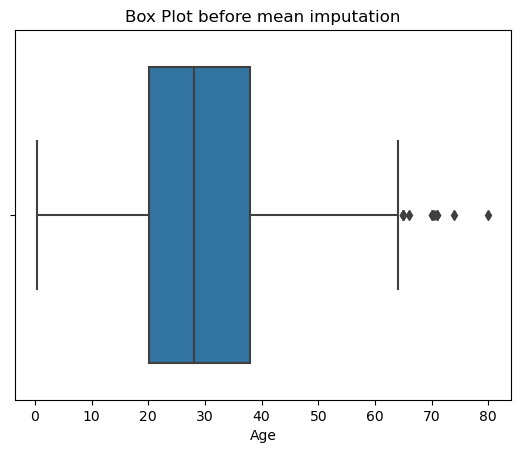

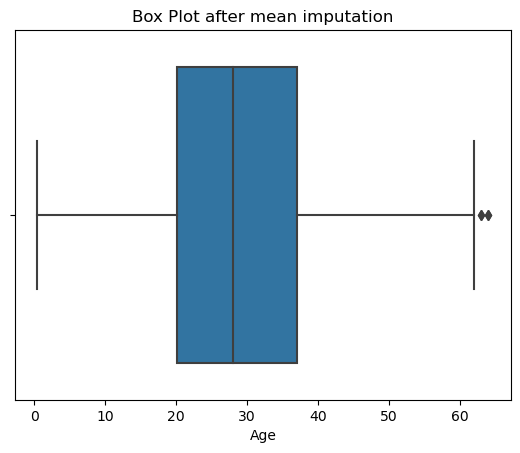

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv("C:/Users/ssmit/Desktop/train.csv")


sns.boxplot(x='Age', data=train)
plt.title("Box Plot before mean imputation")
plt.show()


q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

# Replace Outliers with Mean
m = np.mean(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
        train['Age'] = train['Age'].replace(i, m)

# Boxplot After Mean Imputation
sns.boxplot(x='Age', data=train)
plt.title("Box Plot after mean imputation")
plt.show()
  

# Median Imputation

Method used to replace missing values in a dataset with the median of the available values for that particular variable. 

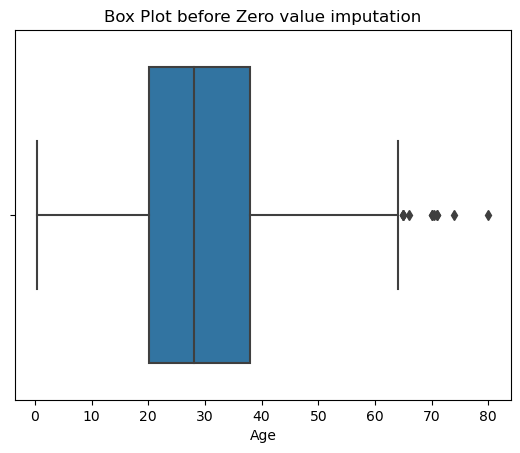

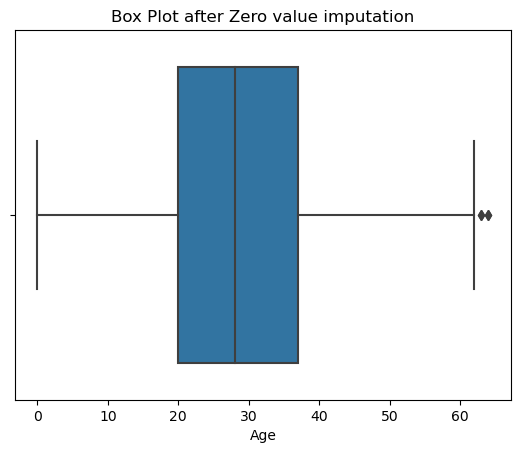

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv("C:/Users/ssmit/Desktop/train.csv")


sns.boxplot(x='Age', data=train)
plt.title("Box Plot before Zero value imputation")
plt.show()


q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

# Replace Outliers with Zero
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
        train['Age'] = train['Age'].replace(i, 0)

# Boxplot After Zero-Value Imputation
sns.boxplot(x='Age', data=train)
plt.title("Box Plot after Zero value imputation")
plt.show()



# Zero Value Imputation

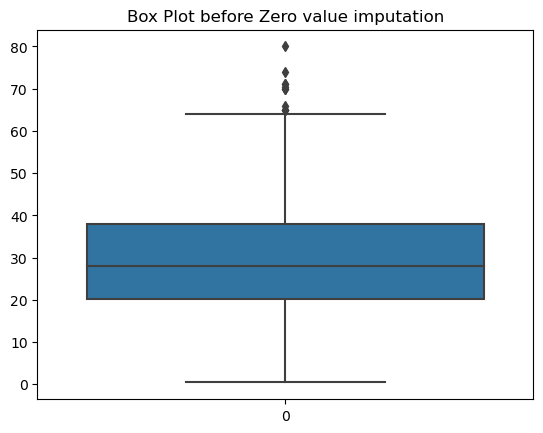

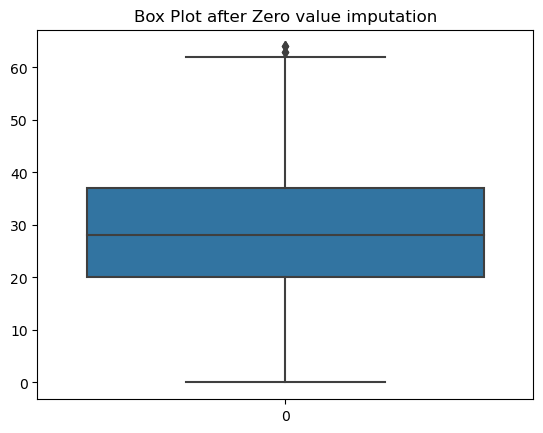

In [61]:
import pandas as pd
import numpy as np
train = pd.read_csv("C:/Users/ssmit/Desktop/train.csv")
sns.boxplot(train['Age'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, 0)
sns.boxplot(train['Age'])
plt.title("Box Plot after Zero value imputation")
plt.show() 

# Conclusion
 
1. Median is best measure of central tendency when the data has outlier or skewed due to it being less influenced by extreme values.
2. Winsorization Methodis better outlier detection technique the others.
3. Median imputation completely removed outliers.